time 0.02
time 0.04
time 0.06
time 0.08
time 0.1
time 0.12
time 0.14
time 0.16
time 0.18
time 0.2
time 0.22
time 0.24
time 0.26
time 0.28
time 0.3
time 0.32
time 0.34
time 0.36
time 0.38
time 0.4
time 0.42
time 0.44
time 0.46
time 0.48
time 0.5
time 0.52
time 0.54
time 0.56
time 0.58
time 0.6
time 0.62
time 0.64
time 0.66
time 0.68
time 0.7
time 0.72
time 0.74
time 0.76
time 0.78
time 0.8
time 0.82
time 0.84
time 0.86
time 0.88
time 0.9
time 0.92
time 0.94
time 0.96
time 0.98
time 1.0
time 1.02
time 1.04
time 1.06
time 1.08
time 1.1
time 1.12
time 1.14
time 1.16
time 1.18
time 1.2
time 1.22
time 1.24
time 1.26
time 1.28
time 1.3
time 1.32
time 1.34
time 1.36
time 1.38
time 1.4
time 1.42
time 1.44
time 1.46
time 1.48
time 1.5
time 1.52
time 1.54
time 1.56
time 1.58
time 1.6
time 1.62
time 1.64
time 1.66
time 1.68
time 1.7
time 1.72
time 1.74
time 1.76
time 1.78
time 1.8
time 1.82
time 1.84
time 1.86
time 1.88
time 1.9
time 1.92
time 1.94
time 1.96
time 1.98
time 2.0
Producing animation.

0

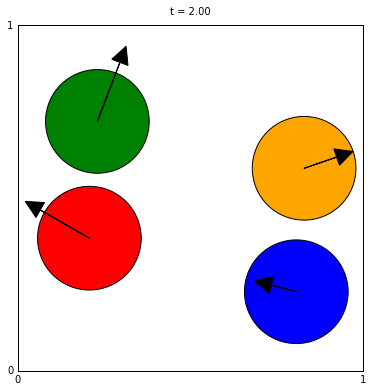

In [1]:
%matplotlib inline
import os, math, pylab

output_dir = "event_disks_box_movie"
colors = ['r', 'b', 'g', 'orange']

def wall_time(pos_a, vel_a, sigma):
    if vel_a > 0.0:
        del_t = (1.0 - sigma - pos_a) / vel_a
    elif vel_a < 0.0:
        del_t = (pos_a - sigma) / abs(vel_a)
    else:
        del_t = float('inf')
    return del_t

def pair_time(pos_a, vel_a, pos_b, vel_b, sigma):
    del_x = [pos_b[0] - pos_a[0], pos_b[1] - pos_a[1]]
    del_x_sq = del_x[0] ** 2 + del_x[1] ** 2
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]]
    del_v_sq = del_v[0] ** 2 + del_v[1] ** 2
    scal = del_v[0] * del_x[0] + del_v[1] * del_x[1]
    Upsilon = scal ** 2 - del_v_sq * (del_x_sq - 4.0 * sigma ** 2)
    if Upsilon > 0.0 and scal < 0.0:
        del_t = - (scal + math.sqrt(Upsilon)) / del_v_sq
    else:
        del_t = float('inf')
    return del_t

def min_arg(l):
    return min(zip(l, range(len(l))))

def compute_next_event(pos, vel):
    wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k, l in singles]
    pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
    return min_arg(wall_times + pair_times)

def compute_new_velocities(pos, vel, next_event_arg):
    if next_event_arg < len(singles):
        collision_disk, direction = singles[next_event_arg]
        vel[collision_disk][direction] *= -1.0
    else:
        a, b = pairs[next_event_arg - len(singles)]
        del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]]
        abs_x = math.sqrt(del_x[0] ** 2 + del_x[1] ** 2)
        e_perp = [c / abs_x for c in del_x]
        del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
        scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
        for k in range(2):
            vel[a][k] += e_perp[k] * scal
            vel[b][k] -= e_perp[k] * scal

pylab.subplots_adjust(left=0.10, right=0.90, top=0.90, bottom=0.10)
pylab.gcf().set_size_inches(6, 6)
img = 0
if not os.path.exists(output_dir): os.makedirs(output_dir)
def snapshot(t, pos, vel, colors, arrow_scale=.2):
    global img
    pylab.cla()
    pylab.axis([0, 1, 0, 1])
    pylab.setp(pylab.gca(), xticks=[0, 1], yticks=[0, 1])
    for (x, y), (dx, dy), c in zip(pos, vel, colors):
        dx *= arrow_scale
        dy *= arrow_scale
        circle = pylab.Circle((x, y), radius=sigma, fc=c)
        pylab.gca().add_patch(circle)
        pylab.arrow( x, y, dx, dy, fc="k", ec="k", head_width=0.05, head_length=0.05 )
    pylab.text(.5, 1.03, 't = %.2f' % t, ha='center')
    pylab.savefig(os.path.join(output_dir, '%04i.png' % img))
    img += 1

pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
vel = [[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]]
singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
sigma = 0.15
t = 0.0
dt = 0.02     # dt=0 corresponds to event-to-event animation
n_steps = 100
next_event, next_event_arg = compute_next_event(pos, vel)
snapshot(t, pos, vel, colors)
for step in range(n_steps):
    if dt:
        next_t = t + dt
    else:
        next_t = t + next_event
    while t + next_event <= next_t:
        t += next_event
        for k, l in singles: pos[k][l] += vel[k][l] * next_event
        compute_new_velocities(pos, vel, next_event_arg)
        next_event, next_event_arg = compute_next_event(pos, vel)
    remain_t = next_t - t
    for k, l in singles: pos[k][l] += vel[k][l] * remain_t
    t += remain_t
    next_event -= remain_t
    snapshot(t, pos, vel, colors)
    print 'time',t

print('Producing animation.gif using ImageMagick...')
os.system("convert -delay 1 -dispose Background +page " + str(output_dir)
          + "/*.png -loop 0 " + str(output_dir) + "/animation.gif")